### **The Reuters Dataset**
It is a set of short newswires and their topics, published by Reuters in 1986. It's a simple, widely used toy dataset for text classification. There are 46 differrnt topics; some topics are more represented than others (i.e. class imbalance). However, each topic has at least 10 examples in the training set.





In [1]:
# Loading the Returns Dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


Here, we have 8,982 training examples and 2,246 test examples.

In [2]:
print("Length of training data: ", len(train_data))
print("Length of testing data: ", len(test_data))

Length of training data:  8982
Length of testing data:  2246


As per our previous examples (IMDB reviews), here also each example is a list of integers (word indices):

In [15]:
train_data[10]
#print(len(train_data[10]))

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Here also we also decode it to the words

In [12]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[10]])
## Note that the indices are offset by 3 because 0,1, and 2 are reserved indices for "padding", "start of sequence" and "unknown" respectively
print(decoded_newswire)

? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [53]:
# Lets encode the string again
from random import seed
from random import randint

len(decoded_newswire)
l = []
for i in decoded_newswire.split():
  l.append(i)
word_dict = {1 : '?'}
for i in range(len(l)):
  value = randint(1, 10000)
  word_dict[value] = l[i]
for key in word_dict:
  print(key, end=" ")

1 2857 5547 8908 3448 7612 4282 5610 9901 2391 3836 8130 6848 8118 5013 6793 1328 8656 9960 4161 9560 8360 4164 1835 2533 7432 3316 9032 279 7852 2664 5383 

We can observe the encode value is not same as we use random integer because actual value of each of the word is unknown to us. However with this procedure we can encode the dataset and each word will be represent with a unique character. 

### **Prepare the Data**

In [56]:
# 1. Encode the train and test data in vectorize sequence
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) #creates an all-zero matrix of shape = length of the sequences
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1 #set specific indices of results[i] to 1s
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [58]:
# 2. Encode the train and test labels with one_hot encoding as it is a classification problem and the labels are categorical data
def to_one_hot (labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i,label in enumerate(labels):
    results[i, label] = 1
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
# Instead of this function you can use to_categorical method of keras)

### **Building your Network**

In [60]:
# Model Definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 46)                460046    
                                                                 
 dense_5 (Dense)             (None, 46)                2162      
                                                                 
 dense_6 (Dense)             (None, 46)                2162      
                                                                 
 dense_7 (Dense)             (None, 46)                2162      
                                                                 
Total params: 466,532
Trainable params: 466,532
Non-trainable params: 0
_________________________________________________________________


In [62]:
#compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
# Setting aside a validating set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [65]:
#Train the model
history = model.fit(partial_x_train, partial_y_train, epochs =50, batch_size=256, validation_data=(x_val,y_val))

Epoch 1/50
32/32 [==============================] - 3s 15ms/step - loss: 2.4737 - accuracy: 0.5259 - val_loss: 1.6330 - val_accuracy: 0.6330
Epoch 2/50
32/32 [==============================] - 0s 9ms/step - loss: 1.3680 - accuracy: 0.6984 - val_loss: 1.3218 - val_accuracy: 0.7010
Epoch 3/50
32/32 [==============================] - 0s 10ms/step - loss: 1.0279 - accuracy: 0.7726 - val_loss: 1.1894 - val_accuracy: 0.7390
Epoch 4/50
32/32 [==============================] - 0s 8ms/step - loss: 0.7961 - accuracy: 0.8207 - val_loss: 1.0480 - val_accuracy: 0.7820
Epoch 5/50
32/32 [==============================] - 0s 9ms/step - loss: 0.6214 - accuracy: 0.8659 - val_loss: 1.0122 - val_accuracy: 0.7780
Epoch 6/50
32/32 [==============================] - 0s 9ms/step - loss: 0.4862 - accuracy: 0.9000 - val_loss: 0.9855 - val_accuracy: 0.7900
Epoch 7/50
32/32 [==============================] - 0s 9ms/step - loss: 0.3874 - accuracy: 0.9171 - val_loss: 1.0198 - val_accuracy: 0.7960
Epoch 8/50
32/32 [

In [66]:
#let's take a look what the history content
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

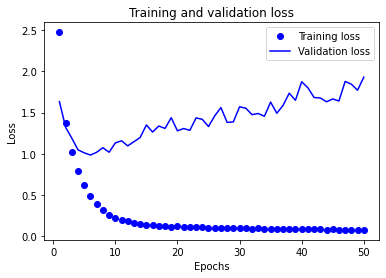

In [68]:
#ploting the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,51)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

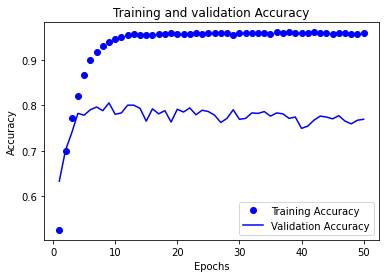

In [70]:
#ploting the training and validation accuracy
import matplotlib.pyplot as plt
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1,51)
plt.plot(epochs,loss_values,'bo',label='Training Accuracy')
plt.plot(epochs,val_loss_values,'b',label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see clearly the model is tend to overfit after 10 epochs and the dimension of the layer we choose is not convincing. So let's retry a model from scratch

In [71]:
#the model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='relu'))
model.add(layers.Dense(46,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640064    
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 46)                2990      
                                                                 
 dense_11 (Dense)            (None, 46)                2162      
                                                                 
 dense_12 (Dense)            (None, 46)                2162      
                                                                 
Total params: 651,538
Trainable params: 651,538
Non-trainable params: 0
_________________________________________________________________


In [72]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
#Train the model
history = model.fit(partial_x_train, partial_y_train, epochs =10, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/10
16/16 [==============================] - 1s 25ms/step - loss: 3.4975 - accuracy: 0.3053 - val_loss: 2.9247 - val_accuracy: 0.3540
Epoch 2/10
16/16 [==============================] - 0s 15ms/step - loss: 2.3570 - accuracy: 0.4737 - val_loss: 1.8696 - val_accuracy: 0.5330
Epoch 3/10
16/16 [==============================] - 0s 15ms/step - loss: 1.6541 - accuracy: 0.5863 - val_loss: 1.5221 - val_accuracy: 0.6290
Epoch 4/10
16/16 [==============================] - 0s 15ms/step - loss: 1.2955 - accuracy: 0.7057 - val_loss: 1.3432 - val_accuracy: 0.7010
Epoch 5/10
16/16 [==============================] - 0s 15ms/step - loss: 1.0250 - accuracy: 0.7575 - val_loss: 1.2218 - val_accuracy: 0.7320
Epoch 6/10
16/16 [==============================] - 0s 15ms/step - loss: 0.8059 - accuracy: 0.8096 - val_loss: 1.1681 - val_accuracy: 0.7640
Epoch 7/10
16/16 [==============================] - 0s 15ms/step - loss: 0.6180 - accuracy: 0.8469 - val_loss: 1.1695 - val_accuracy: 0.7700
Epoch 8/10
16

We can see the validation accuracy is improved and the difference between training and validation accuracy has been decreased.

In [75]:
#Testing the model
results = model.evaluate(x_test,one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 3ms/step - loss: 1.3097 - accuracy: 0.7622
[1.3096661567687988, 0.7622439861297607]


In [76]:
# test the data with random shuffling
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.1856634016028495

In [77]:
# Generating predictions for new data
predictions = model.predict(x_test)

In [78]:
print("Prediction shape: ", predictions[1].shape)
print("coefficients in this vector sum: ", np.sum(predictions[1]))
print("predicted class: ", np.argmax(predictions[1]))

Prediction shape:  (46,)
coefficients in this vector sum:  0.99999994
predicted class:  10


Let's try a different encoding for labels and try to observe what we need to make changes in the model.

In [91]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
print(len(y_test))
print(y_test)

2246
[ 3 10  1 ...  3  3 24]


The model will be exactly same except the loss function. Instead of categorical crossentropy we need to use sparse categorical crossentropy

In [103]:
# Setting aside a validating set
#import tensorflow as tf
#x_train = tf.squeeze(x_train,axis=1)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]
print(y_train)
print(y_val)
#print(x_train.shape)

InvalidArgumentError: ignored

In [104]:
# Model Definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))
model.summary()
#compile the model
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 46)                460046    
                                                                 
 dense_14 (Dense)            (None, 46)                2162      
                                                                 
 dense_15 (Dense)            (None, 46)                2162      
                                                                 
 dense_16 (Dense)            (None, 46)                2162      
                                                                 
Total params: 466,532
Trainable params: 466,532
Non-trainable params: 0
_________________________________________________________________


In [105]:
#Train the model
model.summary()
history = model.fit(x_train, y_train, epochs =10, batch_size=512, validation_data=(x_val,y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 46)                460046    
                                                                 
 dense_14 (Dense)            (None, 46)                2162      
                                                                 
 dense_15 (Dense)            (None, 46)                2162      
                                                                 
 dense_16 (Dense)            (None, 46)                2162      
                                                                 
Total params: 466,532
Trainable params: 466,532
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
18/18 [==============================] - 1s 24ms/step - loss: 2.6435 - acc: 0.4893 - val_loss: 1.6743 - val_acc: 0.6550
Epoch 2/10
18/18 [==============================]

The importance of having sufficiently large intermediate layers

In [107]:
# Model Definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(46, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))
model.summary()
#compile the model
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs =10, batch_size=512, validation_data=(x_val,y_val))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 46)                460046    
                                                                 
 dense_22 (Dense)            (None, 4)                 188       
                                                                 
 dense_23 (Dense)            (None, 46)                230       
                                                                 
 dense_24 (Dense)            (None, 46)                2162      
                                                                 
Total params: 462,626
Trainable params: 462,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
18/18 [==============================] - 1s 23ms/step - loss: 3.0888 - accuracy: 0.4767 - val_loss: 2.2225 - val_accuracy: 0.5490
Epoch 2/10
18/18 [=====================

We can clearly observe a drop in accuracy as by decreasing the no. of nodes in the hidden layer, we have lost a lof of information.